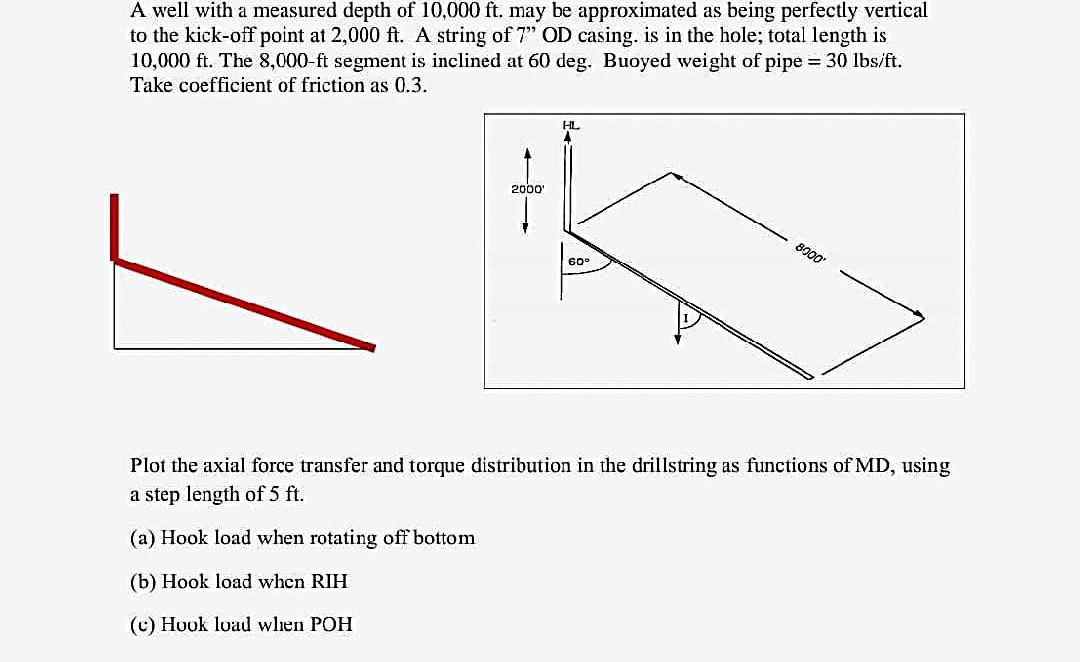

I calculated the mechanical forces involved in lifting the drill string and also gave a visual representation of the hook load and torque variation. In summarry, this code simulates the hook load and torque experienced during a drilling operation.

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Drilling off Bottom

Depth:     0 ft | Hook Load:       0.00 lb
Depth:     5 ft | Hook Load:      75.00 lb
Depth:    10 ft | Hook Load:     150.00 lb
Depth:    15 ft | Hook Load:     225.00 lb
Depth:    20 ft | Hook Load:     300.00 lb
Depth:    25 ft | Hook Load:     375.00 lb
Depth:    30 ft | Hook Load:     450.00 lb
Depth:    35 ft | Hook Load:     525.00 lb
Depth:    40 ft | Hook Load:     600.00 lb
Depth:    45 ft | Hook Load:     675.00 lb
Depth:    50 ft | Hook Load:     750.00 lb
Depth:    55 ft | Hook Load:     825.00 lb
Depth:    60 ft | Hook Load:     900.00 lb
Depth:    65 ft | Hook Load:     975.00 lb
Depth:    70 ft | Hook Load:    1050.00 lb
Depth:    75 ft | Hook Load:    1125.00 lb
Depth:    80 ft | Hook Load:    1200.00 lb
Depth:    85 ft | Hook Load:    1275.00 lb
Depth:    90 ft | Hook Load:    1350.00 lb
Depth:    95 ft | Hook Load:    1425.00 lb
Depth:   100 ft | Hook Load:    1500.00 lb
Depth:   105 ft | Hook Load:    1575.00 lb
Depth:   110 ft | Hook Load:    1650.00 lb
Depth:   11

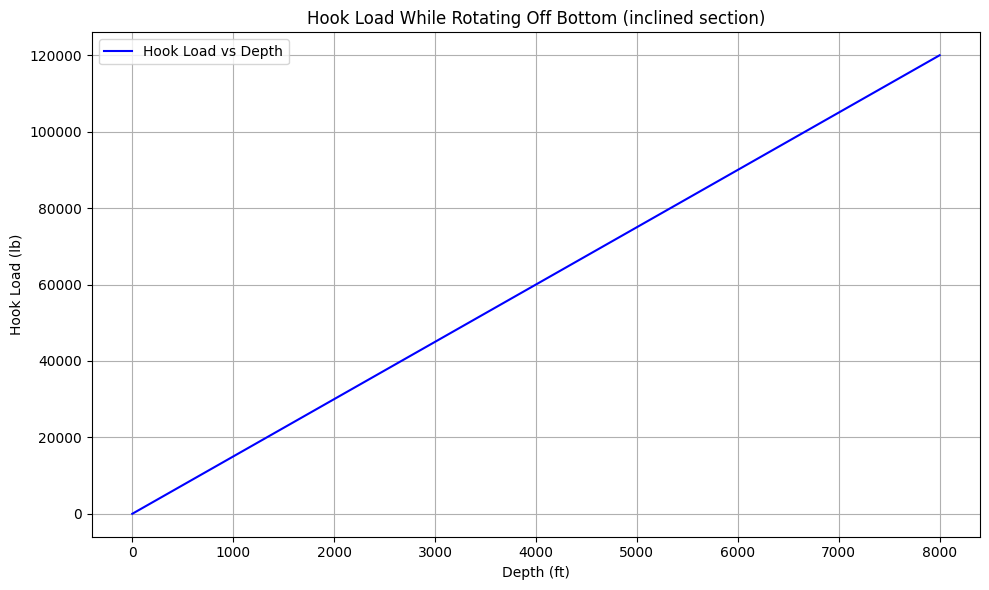

In [ ]:
# === Constants ===
Wb = 30               # Buoyed weight per foot (lb/ft)
mu_actual = 0       # Coefficient of friction (frictionless)
angle_deg = 60        # Inclination angle in degrees
angle_rad = math.radians(angle_deg)  # Convert to radians
step = 5              # Step increment in ft
max_depth = 8000     # Maximum depth in ft

## === For the inclined section ==== ##

# === Initialize ===
f1 = 0   # Initial hook load
mu = 0   # Zero friction for first iteration
x = 0

# === Storage Lists ===
depths_to_8000a = []
hook_loads_to_8000a = []

# === First Iteration (x = 0 ft) ===
f2 = f1 + Wb * (math.cos(angle_rad) - mu * math.sin(angle_rad)) * x
depths_to_8000a.append(x)
hook_loads_to_8000a.append(f2)

# Update for next step
f1 = f2
mu = mu_actual
x += step

# === Loop from 5 ft to 10000 ft in 5 ft steps ===
while x <= max_depth:
    f2 = f1 + Wb * (math.cos(angle_rad) - mu * math.sin(angle_rad)) * step
    depths_to_8000a.append(x)
    hook_loads_to_8000a.append(f2)

    f1 = f2
    x += step

# === Print Results ===
for d, f in zip(depths_to_8000a, hook_loads_to_8000a):
    print(f"Depth: {d:5} ft | Hook Load: {f:10.2f} lb")

# === Plotting ===
plt.figure(figsize=(10, 6))
plt.plot(depths_to_8000a, hook_loads_to_8000a, label='Hook Load vs Depth', color='blue')
plt.xlabel("Depth (ft)")
plt.ylabel("Hook Load (lb)")
plt.title("Hook Load While Rotating Off Bottom (inclined section)")
plt.grid(True)
plt.legend()

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


In [ ]:
## === For the vertical section ==== ##

angle_deg = 0        # Inclination angle in degrees
angle_rad = math.radians(angle_deg)  # Convert to radians

# Initial condition
angle_deg = 0
x = 8000
end_depth = 10000
f1 = 120000  # Hook load at 8000 ft

# Lists to store results
depths_to_10000b = []
hook_loads_to_10000b = []

# Loop through vertical section
while x < end_depth:
    f2 = f1 + Wb * (math.cos(angle_rad) - mu * math.sin(angle_rad)) * step
    x += step
    depths_to_10000b.append(x)
    hook_loads_to_10000b.append(f2)
    f1 = f2

# Print stored values
for d, f in zip(depths_to_10000b, hook_loads_to_10000b):
    print(f"Depth: {d:5} ft | Hook Load: {f:10.2f} lb")


Depth:  8005 ft | Hook Load:  120150.00 lb
Depth:  8010 ft | Hook Load:  120300.00 lb
Depth:  8015 ft | Hook Load:  120450.00 lb
Depth:  8020 ft | Hook Load:  120600.00 lb
Depth:  8025 ft | Hook Load:  120750.00 lb
Depth:  8030 ft | Hook Load:  120900.00 lb
Depth:  8035 ft | Hook Load:  121050.00 lb
Depth:  8040 ft | Hook Load:  121200.00 lb
Depth:  8045 ft | Hook Load:  121350.00 lb
Depth:  8050 ft | Hook Load:  121500.00 lb
Depth:  8055 ft | Hook Load:  121650.00 lb
Depth:  8060 ft | Hook Load:  121800.00 lb
Depth:  8065 ft | Hook Load:  121950.00 lb
Depth:  8070 ft | Hook Load:  122100.00 lb
Depth:  8075 ft | Hook Load:  122250.00 lb
Depth:  8080 ft | Hook Load:  122400.00 lb
Depth:  8085 ft | Hook Load:  122550.00 lb
Depth:  8090 ft | Hook Load:  122700.00 lb
Depth:  8095 ft | Hook Load:  122850.00 lb
Depth:  8100 ft | Hook Load:  123000.00 lb
Depth:  8105 ft | Hook Load:  123150.00 lb
Depth:  8110 ft | Hook Load:  123300.00 lb
Depth:  8115 ft | Hook Load:  123450.00 lb
Depth:  812

In [ ]:
## === Combining inclined data points and vertical data points === ###

combined_depths = depths_to_8000a + depths_to_10000b
combined_hook_loads = hook_loads_to_8000a + hook_loads_to_10000b


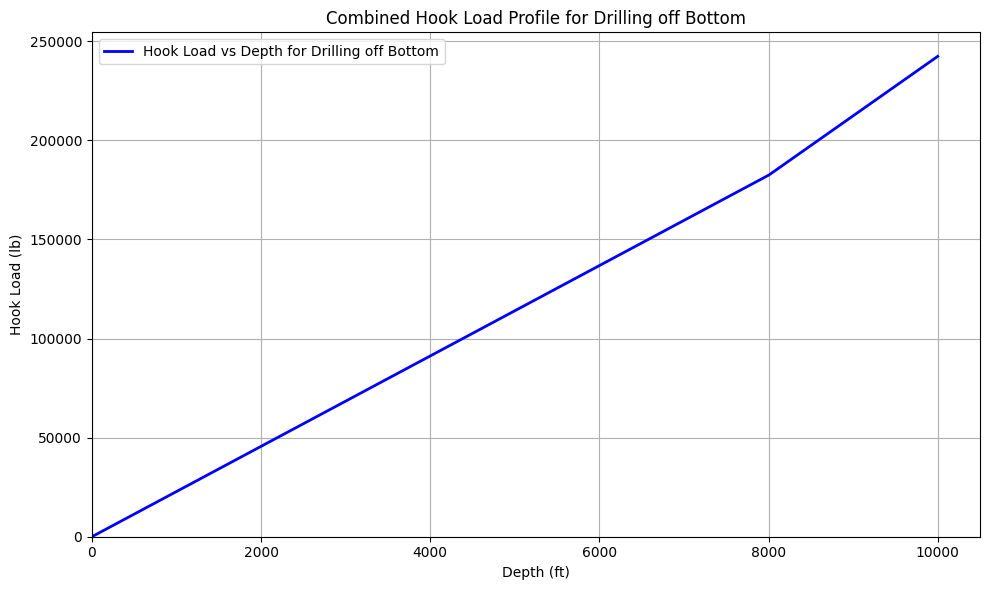

In [ ]:
## === Plotting the combined plot === ##

plt.figure(figsize=(10, 6))
plt.plot(combined_depths, combined_hook_loads, label='Hook Load vs Depth for Drilling off Bottom', color='blue', linewidth=2)
plt.xlabel("Depth (ft)")
plt.ylabel("Hook Load (lb)")
plt.title("Combined Hook Load Profile for Drilling off Bottom")
plt.grid(True)
plt.legend()

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


In [ ]:
## === Torque Calculation for drilling off bottom === #

# recombining the dataset

combined_hookload_unpackeda = [*hook_loads_to_8000a, *hook_loads_to_10000b]
#combined_hookload_unpackeda

combined_depths_unpackeda = [*depths_to_8000a, *depths_to_10000b]
#combined_depths_unpackeda


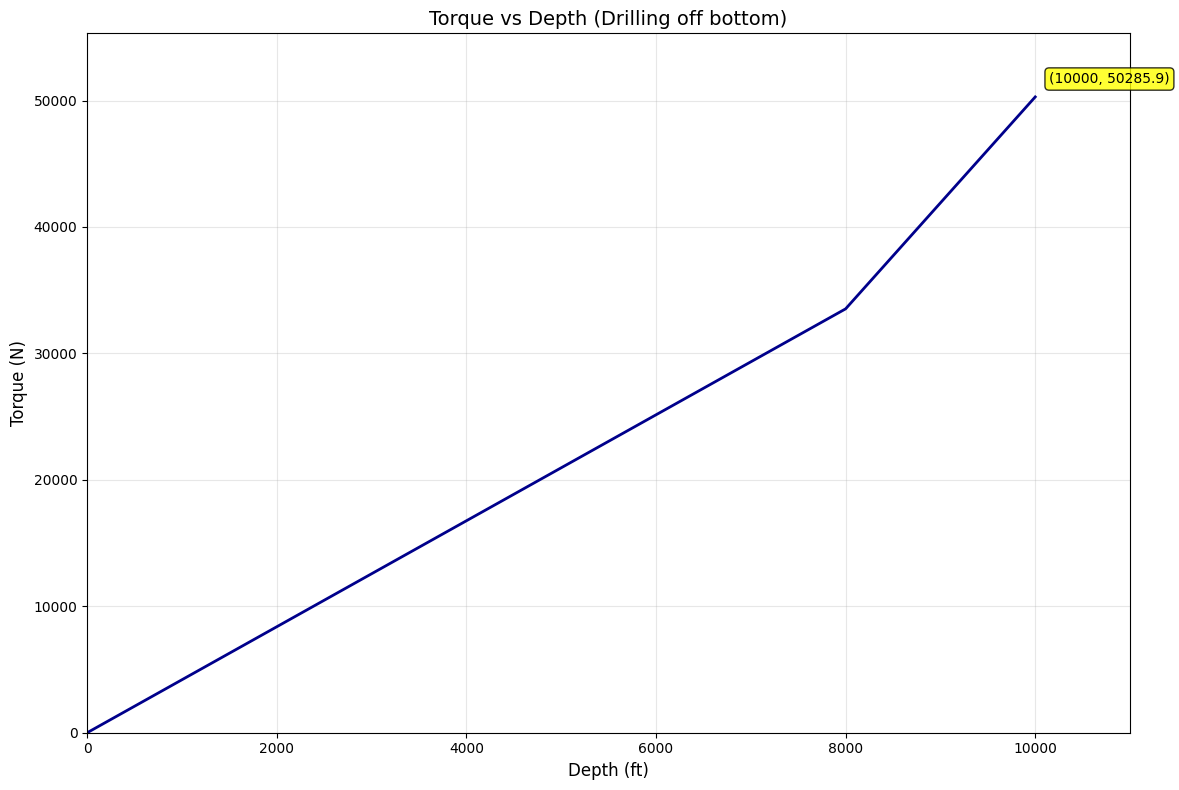

Number of data points: 2001
Depth values: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975,

In [ ]:
# defining the function

def plot_torque_vs_depth(hookloada, depths):
    """
    Calculate torque and plot as a clean single line against depth.
    Formula: T = (7/(2*12)) * f
    """

    # Define constant distance
    d = 7

    # Given coefficient of friction
    mu = 0.3

    # Calculate phi in radians
    phi = math.atan(mu)

    # Calculate torque for each force value
    torque_lista = []
    for f in hookloada:
        T = (d / (2 * 12)) * f * math.cos(phi)
        torque_lista.append(T)

    # Create the plot with a single clean line
    plt.figure(figsize=(12, 8))
    plt.plot(depths, torque_lista, linewidth=2, color='darkblue')

    # Formatting
    plt.xlabel('Depth (ft)', fontsize=12)
    plt.ylabel('Torque (N)', fontsize=12)
    plt.title('Torque vs Depth (Drilling off bottom)', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Add annotations for key points (optional)
    if len(depths) > 1:
        # Annotate the last point
        plt.annotate(f'({depths[-1]}, {torque_lista[-1]:.1f})',
                    xy=(depths[-1], torque_lista[-1]),
                    xytext=(10, 10),
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

    # Set axis limits
    plt.xlim(0, max(depths) * 1.1)
    plt.ylim(0, max(torque_lista) * 1.1)

    # Start axes from zero
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()


    return torque_lista

# setting actual values
combined_depths_unpackeda = [*depths_to_8000a, *depths_to_10000b]
combined_hookload_unpackeda = [*hook_loads_to_8000a, *hook_loads_to_10000b]

# Create the plot
calculated_torques = plot_torque_vs_depth(combined_hookload_unpackeda, combined_depths_unpackeda)

print(f"Number of data points: {len(combined_depths_unpackeda)}")
print(f"Depth values: {combined_depths_unpackeda}")
print(f"Calculated torques: {[round(t, 1) for t in calculated_torques]}")

# Running in Hole

Depth:     0 ft | Hook Load:       0.00 lb
Depth:     5 ft | Hook Load:      36.03 lb
Depth:    10 ft | Hook Load:      72.06 lb
Depth:    15 ft | Hook Load:     108.09 lb
Depth:    20 ft | Hook Load:     144.12 lb
Depth:    25 ft | Hook Load:     180.14 lb
Depth:    30 ft | Hook Load:     216.17 lb
Depth:    35 ft | Hook Load:     252.20 lb
Depth:    40 ft | Hook Load:     288.23 lb
Depth:    45 ft | Hook Load:     324.26 lb
Depth:    50 ft | Hook Load:     360.29 lb
Depth:    55 ft | Hook Load:     396.32 lb
Depth:    60 ft | Hook Load:     432.35 lb
Depth:    65 ft | Hook Load:     468.38 lb
Depth:    70 ft | Hook Load:     504.40 lb
Depth:    75 ft | Hook Load:     540.43 lb
Depth:    80 ft | Hook Load:     576.46 lb
Depth:    85 ft | Hook Load:     612.49 lb
Depth:    90 ft | Hook Load:     648.52 lb
Depth:    95 ft | Hook Load:     684.55 lb
Depth:   100 ft | Hook Load:     720.58 lb
Depth:   105 ft | Hook Load:     756.61 lb
Depth:   110 ft | Hook Load:     792.63 lb
Depth:   11

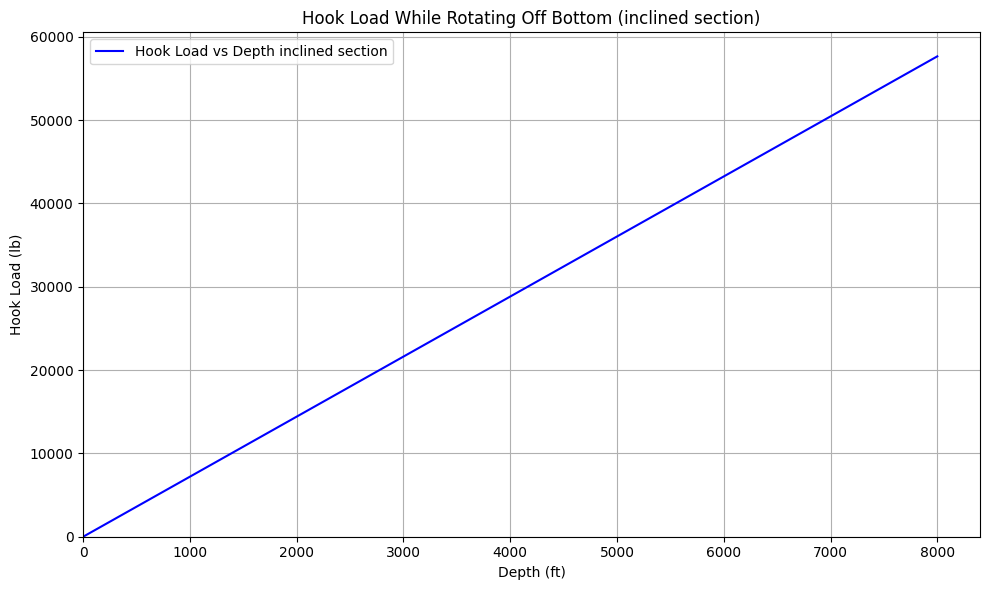

In [ ]:
## === For the inclined section ==== ##

# === Constants ===
Wb = 30               # Buoyed weight per foot (lb/ft)
mu_actual = 0.3       # Coefficient of friction
angle_deg = 60        # Inclination angle in degrees
angle_rad = math.radians(angle_deg)  # Convert to radians
step = 5              # Step increment in ft
max_depth = 8000     # Maximum depth in ft

# === Initialize ===
f1 = 0   # Initial hook load
mu = 0.3
x = 0

# === Storage Lists ===
depths_to_8000c = []
hook_loads_to_8000c = []

# === First Iteration (x = 0 ft) ===
f2 = f1 + Wb * (math.cos(angle_rad) - mu * math.sin(angle_rad)) * x
depths_to_8000c.append(x)
hook_loads_to_8000c.append(f2)

# Update for next step
f1 = f2
mu = mu_actual
x += step

# === Loop from 5 ft to 10000 ft in 5 ft steps ===
while x <= max_depth:
    f2 = f1 + Wb * (math.cos(angle_rad) - mu * math.sin(angle_rad)) * step
    depths_to_8000c.append(x)
    hook_loads_to_8000c.append(f2)

    f1 = f2
    x += step

# === Print Results ===
for d, f in zip(depths_to_8000c, hook_loads_to_8000c):
    print(f"Depth: {d:5} ft | Hook Load: {f:10.2f} lb")

# === Plotting ===
plt.figure(figsize=(10, 6))
plt.plot(depths_to_8000c, hook_loads_to_8000c, label='Hook Load vs Depth inclined section', color='blue')
plt.xlabel("Depth (ft)")
plt.ylabel("Hook Load (lb)")
plt.title("Hook Load While Rotating Off Bottom (inclined section)")
plt.grid(True)
plt.legend()

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


In [ ]:
## === For the vertical section ==== ##

angle_deg = 0        # Inclination angle in degrees
angle_rad = math.radians(angle_deg)  # Convert to radians
cos_i = math.cos(angle_rad)
sin_i = math.sin(angle_rad)
step = 5

# Initial condition
x = 8000
end_depth = 10000
f1 = 57646.17  # Hook load at 8000 ft

# Lists to store results
depths_to_10000d = []
hook_loads_to_10000d = []

# Loop through vertical section
while x < end_depth:
    f2 = f1 + Wb * (cos_i - mu * sin_i) * step
    x += step
    depths_to_10000d.append(x)
    hook_loads_to_10000d.append(f2)
    f1 = f2

# Print stored values
for d, f in zip(depths_to_10000d, hook_loads_to_10000d):
    print(f"Depth: {d:5} ft | Hook Load: {f:10.2f} lb")


Depth:  8005 ft | Hook Load:   57796.17 lb
Depth:  8010 ft | Hook Load:   57946.17 lb
Depth:  8015 ft | Hook Load:   58096.17 lb
Depth:  8020 ft | Hook Load:   58246.17 lb
Depth:  8025 ft | Hook Load:   58396.17 lb
Depth:  8030 ft | Hook Load:   58546.17 lb
Depth:  8035 ft | Hook Load:   58696.17 lb
Depth:  8040 ft | Hook Load:   58846.17 lb
Depth:  8045 ft | Hook Load:   58996.17 lb
Depth:  8050 ft | Hook Load:   59146.17 lb
Depth:  8055 ft | Hook Load:   59296.17 lb
Depth:  8060 ft | Hook Load:   59446.17 lb
Depth:  8065 ft | Hook Load:   59596.17 lb
Depth:  8070 ft | Hook Load:   59746.17 lb
Depth:  8075 ft | Hook Load:   59896.17 lb
Depth:  8080 ft | Hook Load:   60046.17 lb
Depth:  8085 ft | Hook Load:   60196.17 lb
Depth:  8090 ft | Hook Load:   60346.17 lb
Depth:  8095 ft | Hook Load:   60496.17 lb
Depth:  8100 ft | Hook Load:   60646.17 lb
Depth:  8105 ft | Hook Load:   60796.17 lb
Depth:  8110 ft | Hook Load:   60946.17 lb
Depth:  8115 ft | Hook Load:   61096.17 lb
Depth:  812

In [ ]:
# Combining inclined data points and vertical data points for Running in Hole

combined_depths = depths_to_8000c + depths_to_10000d
combined_hook_loads = hook_loads_to_8000c + hook_loads_to_10000d


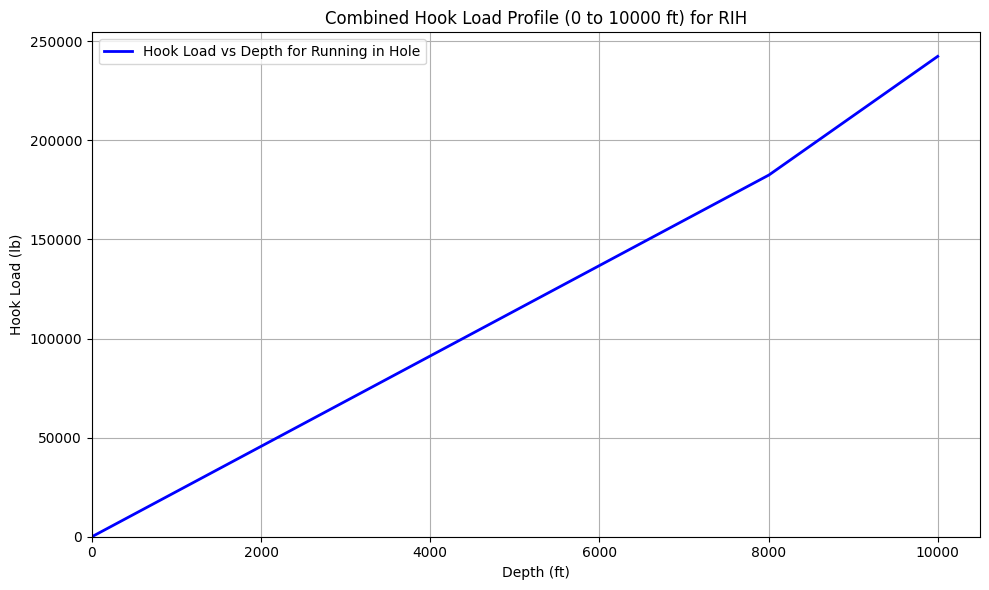

In [ ]:
## === Plotting the combined plot for running in hole === ##

plt.figure(figsize=(10, 6))
plt.plot(combined_depths, combined_hook_loads, label='Hook Load vs Depth for Running in Hole', color='blue', linewidth=2)
plt.xlabel("Depth (ft)")
plt.ylabel("Hook Load (lb)")
plt.title("Combined Hook Load Profile (0 to 10000 ft) for RIH")
plt.grid(True)
plt.legend()

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


In [ ]:
## === Torque Calculation for RIH === #

# recombining the dataset

combined_hookload_unpackedb = [*hook_loads_to_8000c, *hook_loads_to_10000d]
#combined_hookload_unpackedb

combined_depths_unpackedb = [*depths_to_8000c, *depths_to_10000d]
#combined_depths_unpackedb


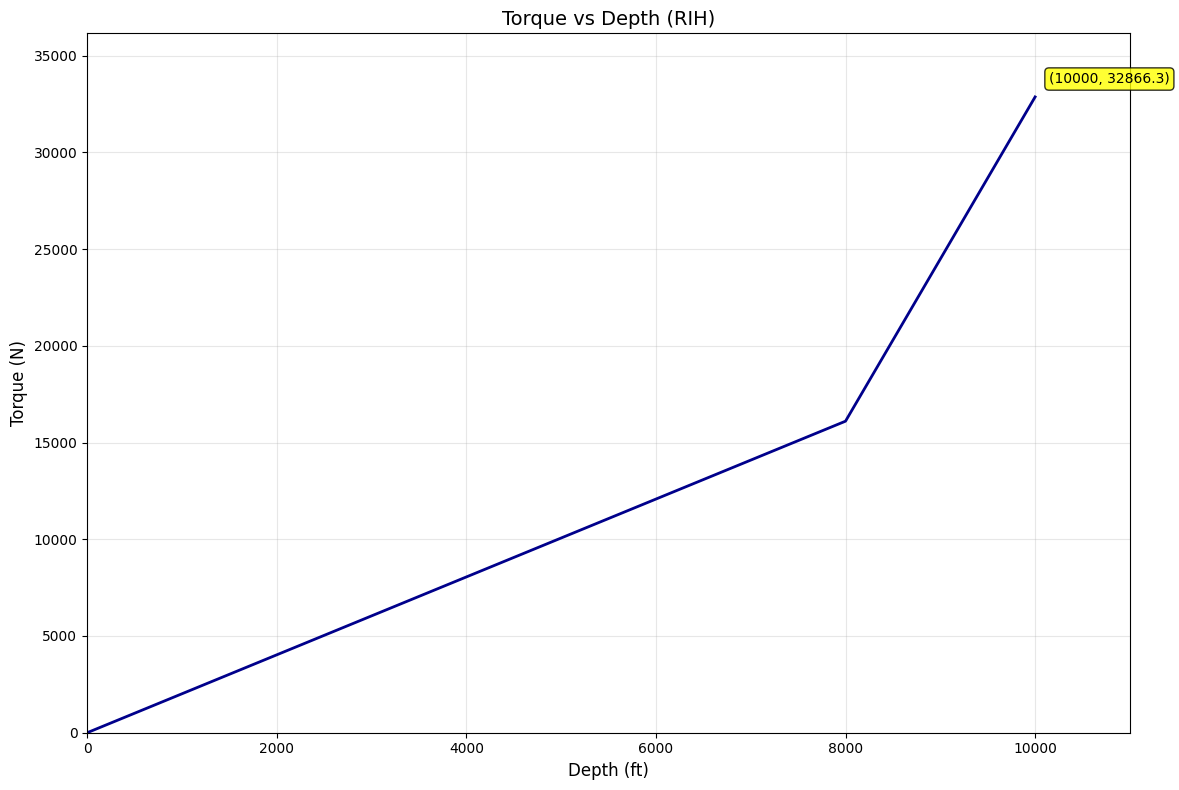

Number of data points: 2001
Depth values: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975,

In [ ]:
# defining the function

def plot_torque_vs_depth(hookloadb, depth_b):
    """
    Calculate torque and plot as a clean single line against depth.
    Formula: T = (7/(2*12)) * f
    """

    # Define constant distance
    d = 7

     # Given coefficient of friction
    mu = 0.3

    # Calculate phi in radians
    phi = math.atan(mu)

    # Calculate torque for each force value
    torque_listb = []
    for f in hookloadb:
        T = (d / (2 * 12)) * f * math.cos(phi)
        torque_listb.append(T)

    # Create the plot with a single clean line
    plt.figure(figsize=(12, 8))
    plt.plot(depth_b, torque_listb, linewidth=2, color='darkblue')

    # Formatting
    plt.xlabel('Depth (ft)', fontsize=12)
    plt.ylabel('Torque (N)', fontsize=12)
    plt.title('Torque vs Depth (RIH)', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Add annotations for key points (optional)
    if len(depth_b) > 1:
        # Annotate the last point
        plt.annotate(f'({depth_b[-1]}, {torque_listb[-1]:.1f})',
                    xy=(depth_b[-1], torque_listb[-1]),
                    xytext=(10, 10),
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

    # Set axis limits
    plt.xlim(0, max(depth_b) * 1.1)
    plt.ylim(0, max(torque_listb) * 1.1)

    # Start axes from zero
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()

    return torque_listb

# setting actual values
combined_depths_unpackedb = [*depths_to_8000c, *depths_to_10000d]
combined_hookload_unpackedb = [*hook_loads_to_8000c, *hook_loads_to_10000d]

# Create the plot
calculated_torques = plot_torque_vs_depth(combined_hookload_unpackedb, combined_depths_unpackedb)

print(f"Number of data points: {len(combined_depths_unpackedb)}")
print(f"Depth values: {combined_depths_unpackedb}")
print(f"Calculated torques: {[round(t, 1) for t in calculated_torques]}")

# Pulling out of hole

Depth:     0 ft | Hook Load:       0.00 lb
Depth:     5 ft | Hook Load:     113.97 lb
Depth:    10 ft | Hook Load:     227.94 lb
Depth:    15 ft | Hook Load:     341.91 lb
Depth:    20 ft | Hook Load:     455.88 lb
Depth:    25 ft | Hook Load:     569.86 lb
Depth:    30 ft | Hook Load:     683.83 lb
Depth:    35 ft | Hook Load:     797.80 lb
Depth:    40 ft | Hook Load:     911.77 lb
Depth:    45 ft | Hook Load:    1025.74 lb
Depth:    50 ft | Hook Load:    1139.71 lb
Depth:    55 ft | Hook Load:    1253.68 lb
Depth:    60 ft | Hook Load:    1367.65 lb
Depth:    65 ft | Hook Load:    1481.62 lb
Depth:    70 ft | Hook Load:    1595.60 lb
Depth:    75 ft | Hook Load:    1709.57 lb
Depth:    80 ft | Hook Load:    1823.54 lb
Depth:    85 ft | Hook Load:    1937.51 lb
Depth:    90 ft | Hook Load:    2051.48 lb
Depth:    95 ft | Hook Load:    2165.45 lb
Depth:   100 ft | Hook Load:    2279.42 lb
Depth:   105 ft | Hook Load:    2393.39 lb
Depth:   110 ft | Hook Load:    2507.37 lb
Depth:   11

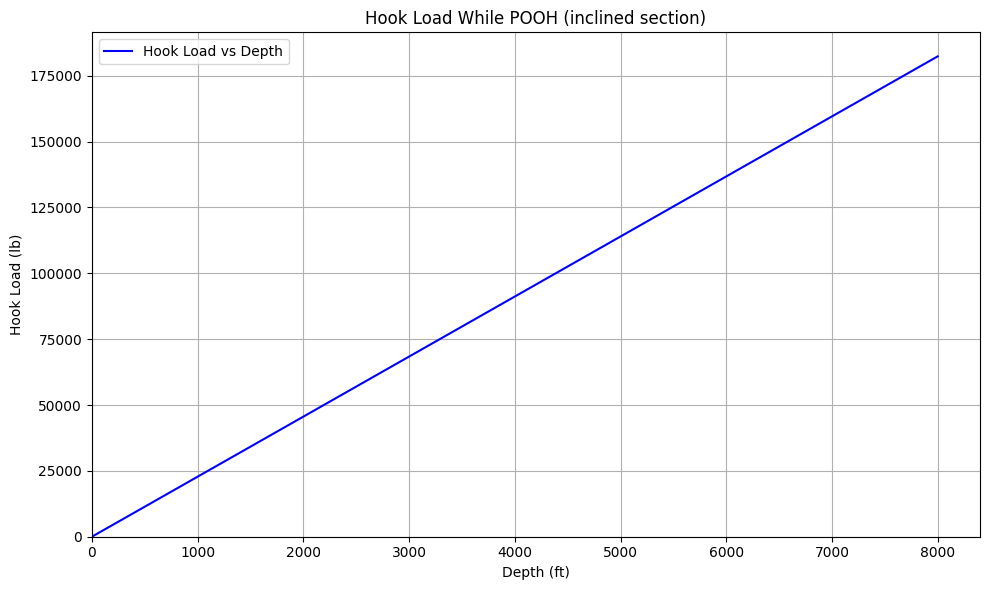

In [ ]:
# === Constants ===
Wb = 30               # Buoyed weight per foot (lb/ft)
mu_actual = 0.3       # Coefficient of friction after first step
angle_deg = 60        # Inclination angle in degrees
angle_rad = math.radians(angle_deg)  # Convert to radians
step = 5              # Step increment in ft
max_depth = 8000     # Maximum depth in ft

## === inclined section === ##

# === Initialize ===
f1 = 0   # Initial hook load
mu = 0.3   # Zero friction for first iteration
x = 0

# === Storage Lists ===
depths_to_8000e = []
hook_loads_to_8000e = []

# === First Iteration (x = 0 ft) ===
f2 = f1 + Wb * (math.cos(angle_rad) + mu * math.sin(angle_rad)) * x
depths_to_8000e.append(x)
hook_loads_to_8000e.append(f2)

# Update for next step
f1 = f2
mu = mu_actual
x += step

# === Loop from 5 ft to 10000 ft in 5 ft steps ===
while x <= max_depth:
    f2 = f1 + Wb * (math.cos(angle_rad) + mu * math.sin(angle_rad)) * step
    depths_to_8000e.append(x)
    hook_loads_to_8000e.append(f2)

    f1 = f2
    x += step

# === Print Results ===
for d, f in zip(depths_to_8000e, hook_loads_to_8000e):
    print(f"Depth: {d:5} ft | Hook Load: {f:10.2f} lb")

# === Plotting ===
plt.figure(figsize=(10, 6))
plt.plot(depths_to_8000e, hook_loads_to_8000e, label='Hook Load vs Depth', color='blue')
plt.xlabel("Depth (ft)")
plt.ylabel("Hook Load (lb)")
plt.title("Hook Load While POOH (inclined section)")
plt.grid(True)
plt.legend()

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


In [ ]:
## === For the vertical section ==== ##

# Constants
Wb = 30              # Buoyed weight (lb/ft)
mu = 0.3
angle_deg = 0        # Vertical section
angle_rad = math.radians(angle_deg)
cos_i = math.cos(angle_rad)
sin_i = math.sin(angle_rad)
step = 5

# Initial condition
x = 8000
end_depth = 10000
f1 = 182353.83  # Hook load at 8000 ft

# Lists to store results
depths_to_10000f = []
hook_loads_to_10000f = []

# Loop through vertical section
while x < end_depth:
    f2 = f1 + Wb * (cos_i + mu * sin_i) * step
    x += step
    depths_to_10000f.append(x)
    hook_loads_to_10000f.append(f2)
    f1 = f2

# Print stored values
for d, f in zip(depths_to_10000f, hook_loads_to_10000f):
    print(f"Depth: {d:5} ft | Hook Load: {f:10.2f} lb")


Depth:  8005 ft | Hook Load:  182503.83 lb
Depth:  8010 ft | Hook Load:  182653.83 lb
Depth:  8015 ft | Hook Load:  182803.83 lb
Depth:  8020 ft | Hook Load:  182953.83 lb
Depth:  8025 ft | Hook Load:  183103.83 lb
Depth:  8030 ft | Hook Load:  183253.83 lb
Depth:  8035 ft | Hook Load:  183403.83 lb
Depth:  8040 ft | Hook Load:  183553.83 lb
Depth:  8045 ft | Hook Load:  183703.83 lb
Depth:  8050 ft | Hook Load:  183853.83 lb
Depth:  8055 ft | Hook Load:  184003.83 lb
Depth:  8060 ft | Hook Load:  184153.83 lb
Depth:  8065 ft | Hook Load:  184303.83 lb
Depth:  8070 ft | Hook Load:  184453.83 lb
Depth:  8075 ft | Hook Load:  184603.83 lb
Depth:  8080 ft | Hook Load:  184753.83 lb
Depth:  8085 ft | Hook Load:  184903.83 lb
Depth:  8090 ft | Hook Load:  185053.83 lb
Depth:  8095 ft | Hook Load:  185203.83 lb
Depth:  8100 ft | Hook Load:  185353.83 lb
Depth:  8105 ft | Hook Load:  185503.83 lb
Depth:  8110 ft | Hook Load:  185653.83 lb
Depth:  8115 ft | Hook Load:  185803.83 lb
Depth:  812

In [ ]:
# Combining inclined data points and vertical data points

combined_depths = depths_to_8000e + depths_to_10000f
combined_hook_loads = hook_loads_to_8000e + hook_loads_to_10000f

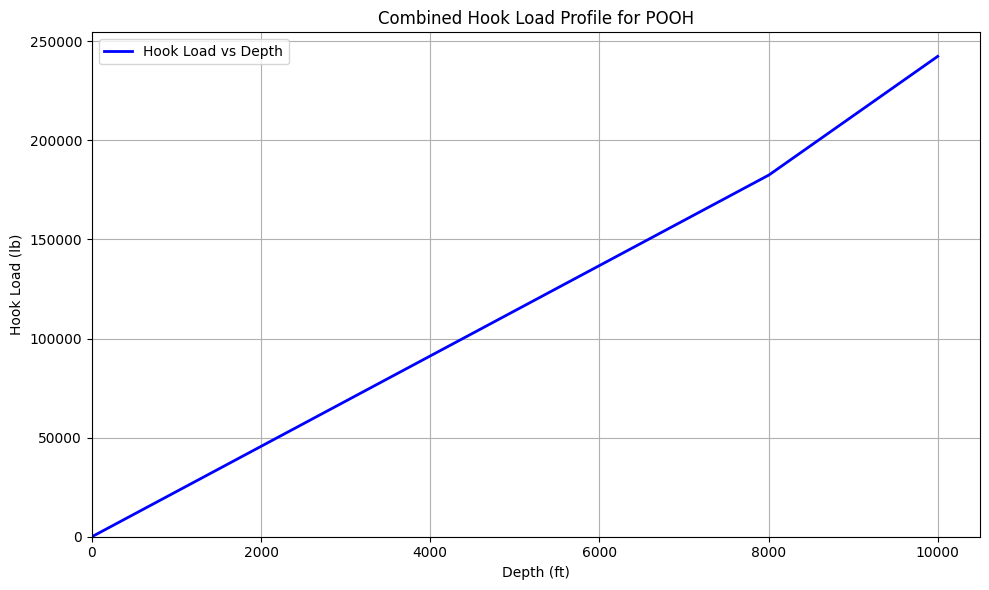

In [ ]:
## === Plotting the combined plot === ##

plt.figure(figsize=(10, 6))
plt.plot(combined_depths, combined_hook_loads, label='Hook Load vs Depth', color='blue', linewidth=2)
plt.xlabel("Depth (ft)")
plt.ylabel("Hook Load (lb)")
plt.title("Combined Hook Load Profile for POOH")
plt.grid(True)
plt.legend()

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


In [ ]:
## === Torque Calculation for POOH === #

# recombining the dataset

combined_hookload_unpackedc = [*hook_loads_to_8000e, *hook_loads_to_10000f]
#combined_hookload_unpackedc

combined_depths_unpackedc = [*depths_to_8000e, *depths_to_10000f]
#combined_depths_unpackedc


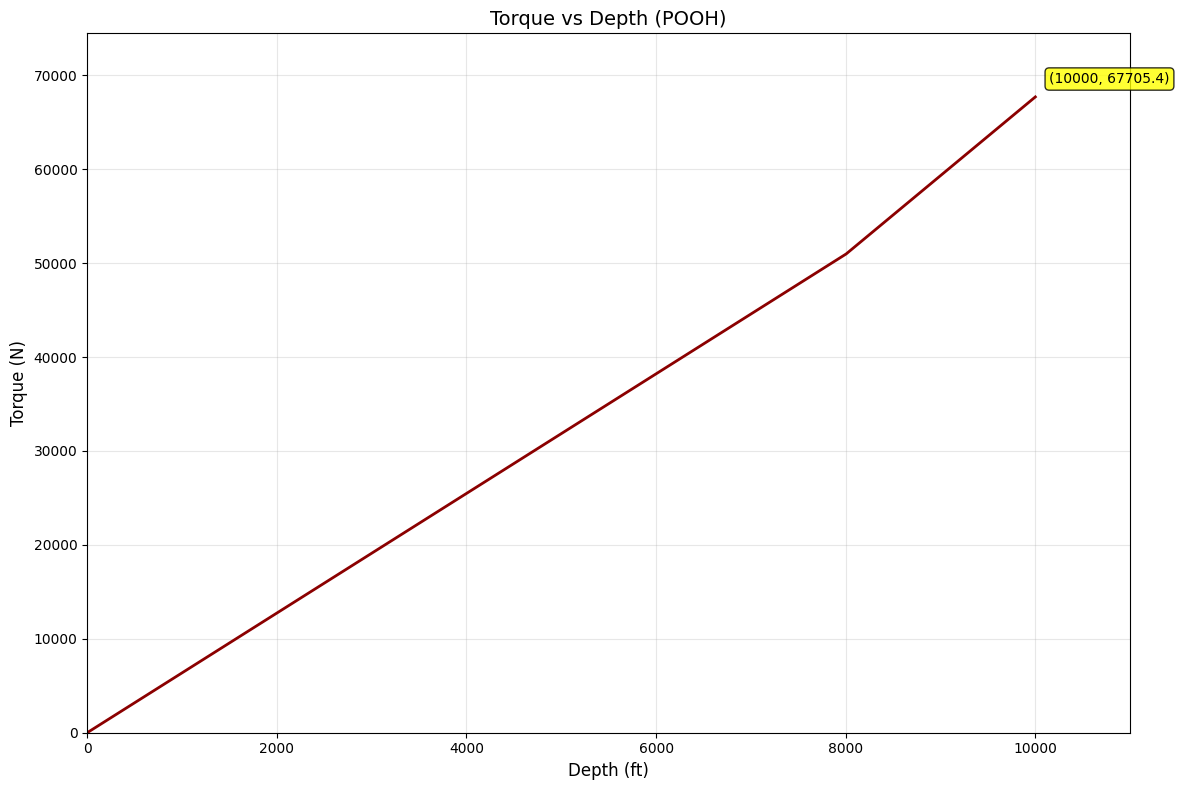

Number of data points: 2001
Depth values: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975,

In [ ]:
# defining the function

def plot_torque_vs_depth_poooh(hookloadc, depth_c):
    """
    Calculate torque and plot as a clean single line against depth (POOH).
    Formula: T = (7 / (2 * 12)) * f
    """

    # Define constant distance
    d = 7

    # Given coefficient of friction
    mu = 0.3

    # Calculate phi in radians
    phi = math.atan(mu)

    # Calculate torque for each force value
    torque_listc = []
    for f in hookloadc:
        T = (d / (2 * 12)) * f * math.cos(phi)
        torque_listc.append(T)

    # Create the plot with a single clean line
    plt.figure(figsize=(12, 8))
    plt.plot(depth_c, torque_listc, linewidth=2, color='darkred')

    # Formatting
    plt.xlabel('Depth (ft)', fontsize=12)
    plt.ylabel('Torque (N)', fontsize=12)
    plt.title('Torque vs Depth (POOH)', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Add annotations for key points (optional)
    if len(depth_c) > 1:
        # Annotate the last point
        plt.annotate(f'({depth_c[-1]}, {torque_listc[-1]:.1f})',
                    xy=(depth_c[-1], torque_listc[-1]),
                    xytext=(10, 10),
                    textcoords='offset points',
                    fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))

    # Set axis limits
    plt.xlim(0, max(depth_c) * 1.1)
    plt.ylim(0, max(torque_listc) * 1.1)

    # Start axes from zero
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    plt.tight_layout()
    plt.show()

    return torque_listc

# setting actual values for POOH
combined_depths_unpackedc = [*depths_to_8000e, *depths_to_10000f]
combined_hookload_unpackedc = [*hook_loads_to_8000e, *hook_loads_to_10000f]

# Create the plot for POOH
calculated_torques_poooh = plot_torque_vs_depth_poooh(combined_hookload_unpackedc, combined_depths_unpackedc)

print(f"Number of data points: {len(combined_depths_unpackedc)}")
print(f"Depth values: {combined_depths_unpackedc}")
print(f"Calculated torques: {[round(t, 1) for t in calculated_torques_poooh]}")

# Hookload and Torque

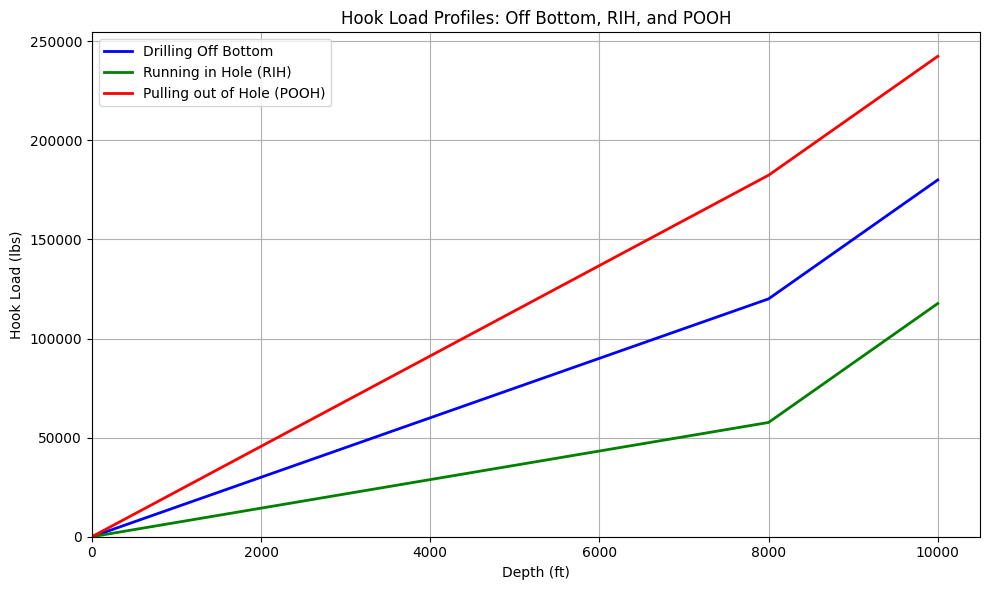

In [ ]:
# Drilling off bottom
combined_depths_off_bottom = depths_to_8000a + depths_to_10000b
combined_hook_loads_off_bottom = hook_loads_to_8000a + hook_loads_to_10000b

# Running in Hole (RIH)
combined_depths_rih = depths_to_8000c + depths_to_10000d
combined_hook_loads_rih = hook_loads_to_8000c + hook_loads_to_10000d

# Pulling out of Hole (POOH)
combined_depths_pooh = depths_to_8000e + depths_to_10000f
combined_hook_loads_pooh = hook_loads_to_8000e + hook_loads_to_10000f

# Combined plot
plt.figure(figsize=(10, 6))

plt.plot(combined_depths_off_bottom, combined_hook_loads_off_bottom, label='Drilling Off Bottom', color='blue', linewidth=2)
plt.plot(combined_depths_rih, combined_hook_loads_rih, label='Running in Hole (RIH)', color='green', linewidth=2)
plt.plot(combined_depths_pooh, combined_hook_loads_pooh, label='Pulling out of Hole (POOH)', color='red', linewidth=2)

plt.xlabel("Depth (ft)")
plt.ylabel("Hook Load (lbs)")
plt.title("Hook Load Profiles: Off Bottom, RIH, and POOH")
plt.grid(True)
plt.legend()

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


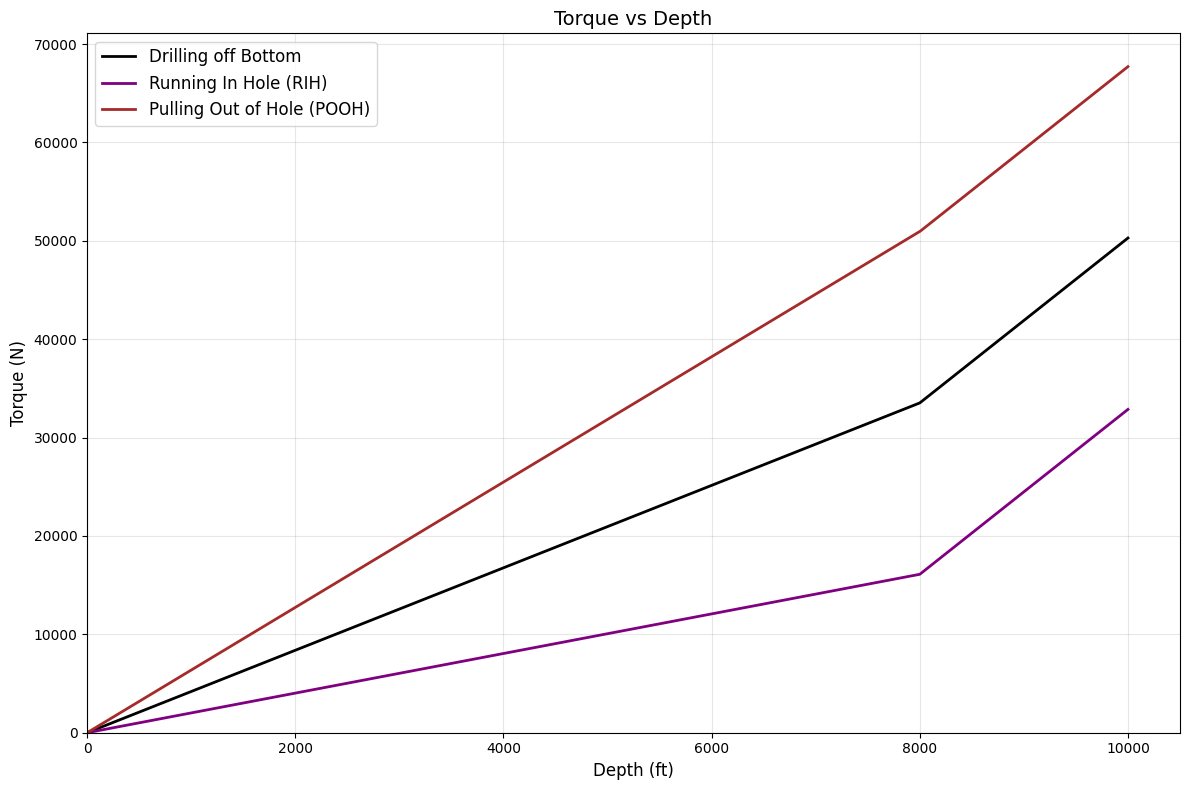

In [ ]:
# Define constants
d = 7  # in inches
mu = 0.3
phi = math.atan(mu)  # angle in radians

def calculate_torque(hookloads):
    return [(d / (2 * 12)) * f * math.cos(phi) for f in hookloads]

# Prepare data for each operation
depths_off_bottom = depths_to_8000a + depths_to_10000b
hookloads_off_bottom = hook_loads_to_8000a + hook_loads_to_10000b
torque_off_bottom = calculate_torque(hookloads_off_bottom)

depths_rih = depths_to_8000c + depths_to_10000d
hookloads_rih = hook_loads_to_8000c + hook_loads_to_10000d
torque_rih = calculate_torque(hookloads_rih)

depths_pooh = depths_to_8000e + depths_to_10000f
hookloads_pooh = hook_loads_to_8000e + hook_loads_to_10000f
torque_pooh = calculate_torque(hookloads_pooh)

# Plot all three curves on a single figure
plt.figure(figsize=(12, 8))

plt.plot(depths_off_bottom, torque_off_bottom, label='Drilling off Bottom', color='black', linewidth=2)
plt.plot(depths_rih, torque_rih, label='Running In Hole (RIH)', color='purple', linewidth=2)
plt.plot(depths_pooh, torque_pooh, label='Pulling Out of Hole (POOH)', color='brown', linewidth=2)

# Formatting the plot
plt.xlabel('Depth (ft)', fontsize=12)
plt.ylabel('Torque (N)', fontsize=12)
plt.title('Torque vs Depth', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Start axes from zero
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.tight_layout()
plt.show()


# Summary

In [ ]:
# Define the final values for each section as provided
# Drilling off bottom
drilling_inclined_f2 = 120000
drilling_vertical_f2 = 60000
drilling_hook_load = drilling_inclined_f2 + drilling_vertical_f2

# Running on Hole
running_inclined_f2 = 57646.17
running_vertical_f2 = 60000
running_hook_load = running_inclined_f2 + running_vertical_f2

# Pulling Out of Hole
pulling_inclined_f2 = 182353.83
pulling_vertical_f2 = 60000
pulling_hook_load = pulling_inclined_f2 + pulling_vertical_f2

# Print the results

print("DRILLING OPERATIONS hookload ANALYSIS")
print("=" * 50)
print()

print("1. Drilling off bottom")
print(f"   Inclined section f2 (final) = {drilling_inclined_f2} lbs")
print(f"   Vertical section f2 (final) = {drilling_vertical_f2} lbs")
print(f"   Hook load = {drilling_hook_load} lbs")
print()

print("2. Running on Hole")
print(f"   Inclined section f2 (final) = {running_inclined_f2} lbs")
print(f"   Vertical section f2 (final) = {running_vertical_f2} lbs")
print(f"   Hook load = {running_hook_load} lbs")
print()

print("3. Pulling Out of Hole")
print(f"   Inclined section f2 (final) = {pulling_inclined_f2} lbs")
print(f"   Vertical section f2 (final) = {pulling_vertical_f2} lbs")
print(f"   Hook load = {pulling_hook_load} lbs")

DRILLING OPERATIONS hookload ANALYSIS

1. Drilling off bottom
   Inclined section f2 (final) = 120000 lbs
   Vertical section f2 (final) = 60000 lbs
   Hook load = 180000 lbs

2. Running on Hole
   Inclined section f2 (final) = 57646.17 lbs
   Vertical section f2 (final) = 60000 lbs
   Hook load = 117646.17 lbs

3. Pulling Out of Hole
   Inclined section f2 (final) = 182353.83 lbs
   Vertical section f2 (final) = 60000 lbs
   Hook load = 242353.83 lbs


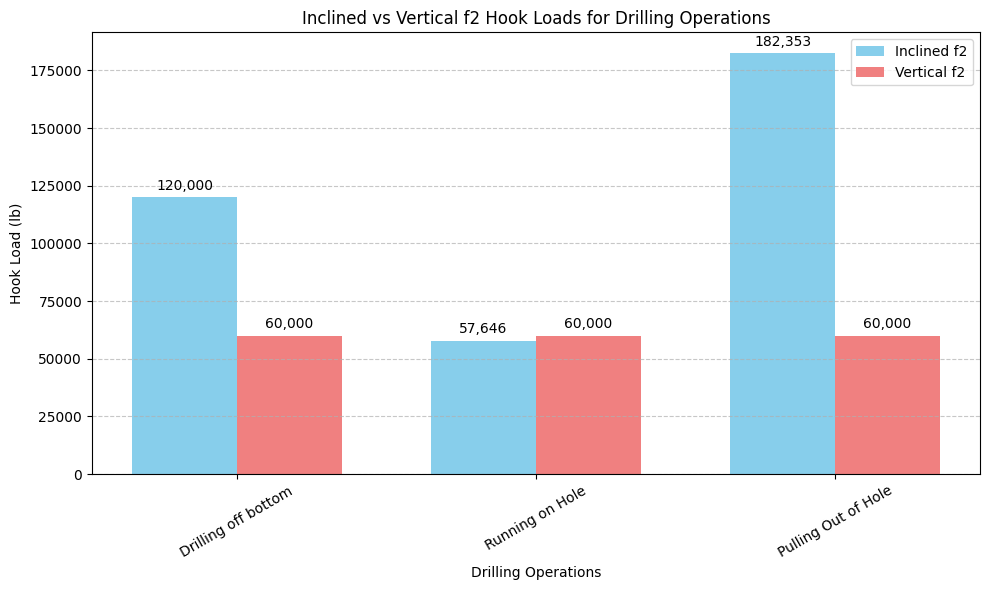

In [ ]:
## === Visualizing all Hookload plots === ##

# Data
operations = ['Drilling off bottom', 'Running on Hole', 'Pulling Out of Hole']
inclined_f2 = [120000, 57646.17, 182353.83]
vertical_f2 = [60000, 60000, 60000]
total_hook_load = [180000, 117646.17, 242353.83]

# Bar positions
x = np.arange(len(operations))
bar_width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - bar_width/2, inclined_f2, width=bar_width, label='Inclined f2', color='skyblue')
bars2 = plt.bar(x + bar_width/2, vertical_f2, width=bar_width, label='Vertical f2', color='lightcoral')

# Add labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f'{int(yval):,}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f'{int(yval):,}', ha='center', va='bottom')

# Axis labels and title
plt.xlabel('Drilling Operations')
plt.ylabel('Hook Load (lb)')
plt.title('Inclined vs Vertical f2 Hook Loads for Drilling Operations')
plt.xticks(ticks=x, labels=operations, rotation=30)
plt.ylim(bottom=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Drilling operations data
operations = ['Drilling off bottom', 'Running on Hole', 'Pulling Out of Hole']
inclined_torques = [35000, 16813.47, 53186.53]  # N
vertical_torques = [52500, 34313.47, 70686.53]  # N

# Print the data
print("DRILLING OPERATIONS torque ANALYSIS")
print("=" * 50)
print()

for i, operation in enumerate(operations):
    print(f"{i+1}. {operation}")
    print(f"   Inclined section f2 (final) = {inclined_torques[i]:,.2f} N")
    print(f"   Vertical section f2 (final) = {vertical_torques[i]:,.2f} N")
    print()


DRILLING OPERATIONS torque ANALYSIS

1. Drilling off bottom
   Inclined section f2 (final) = 35,000.00 N
   Vertical section f2 (final) = 52,500.00 N

2. Running on Hole
   Inclined section f2 (final) = 16,813.47 N
   Vertical section f2 (final) = 34,313.47 N

3. Pulling Out of Hole
   Inclined section f2 (final) = 53,186.53 N
   Vertical section f2 (final) = 70,686.53 N



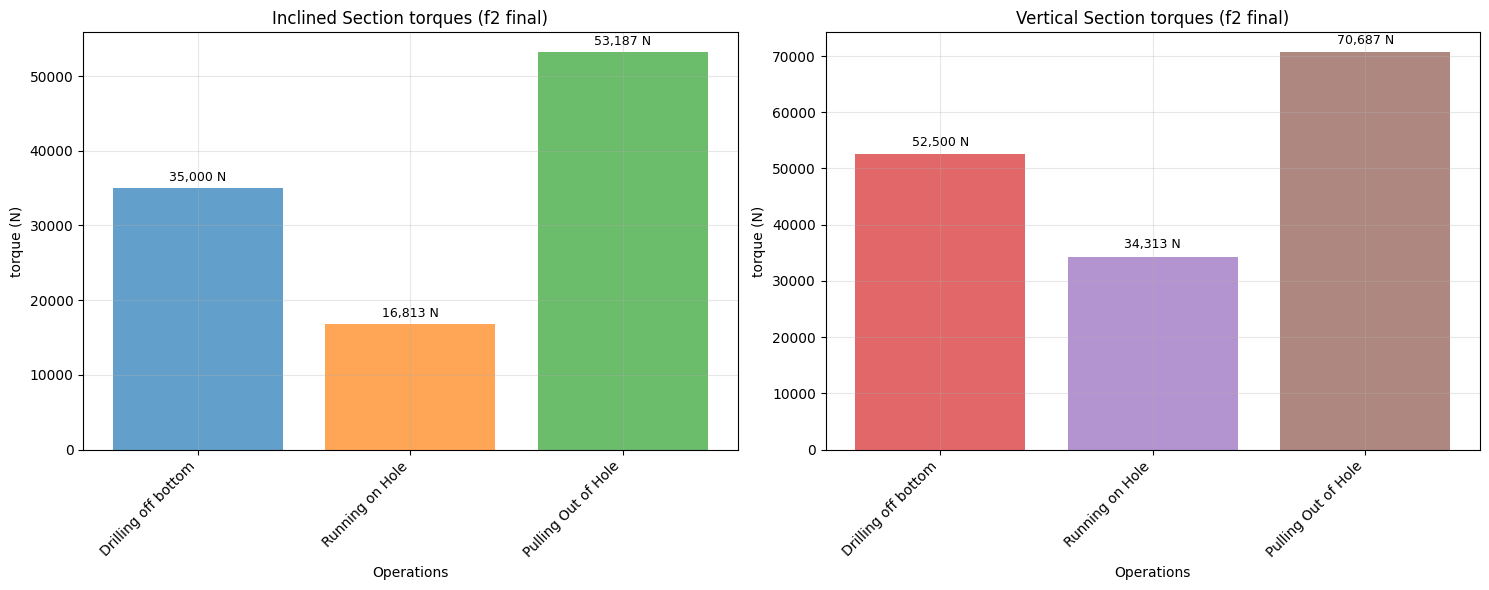

In [ ]:

# Create histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Inclined Section torques
x_pos1 = np.arange(len(operations))
bars1 = ax1.bar(x_pos1, inclined_torques, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
ax1.set_xlabel('Operations')
ax1.set_ylabel('torque (N)')
ax1.set_title('Inclined Section torques (f2 final)')
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(operations, rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{height:,.0f} N', ha='center', va='bottom', fontsize=9)

# Histogram for Vertical Section torques
x_pos2 = np.arange(len(operations))
bars2 = ax2.bar(x_pos2, vertical_torques, color=['#d62728', '#9467bd', '#8c564b'], alpha=0.7)
ax2.set_xlabel('Operations')
ax2.set_ylabel('torque (N)')
ax2.set_title('Vertical Section torques (f2 final)')
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(operations, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'{height:,.0f} N', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()




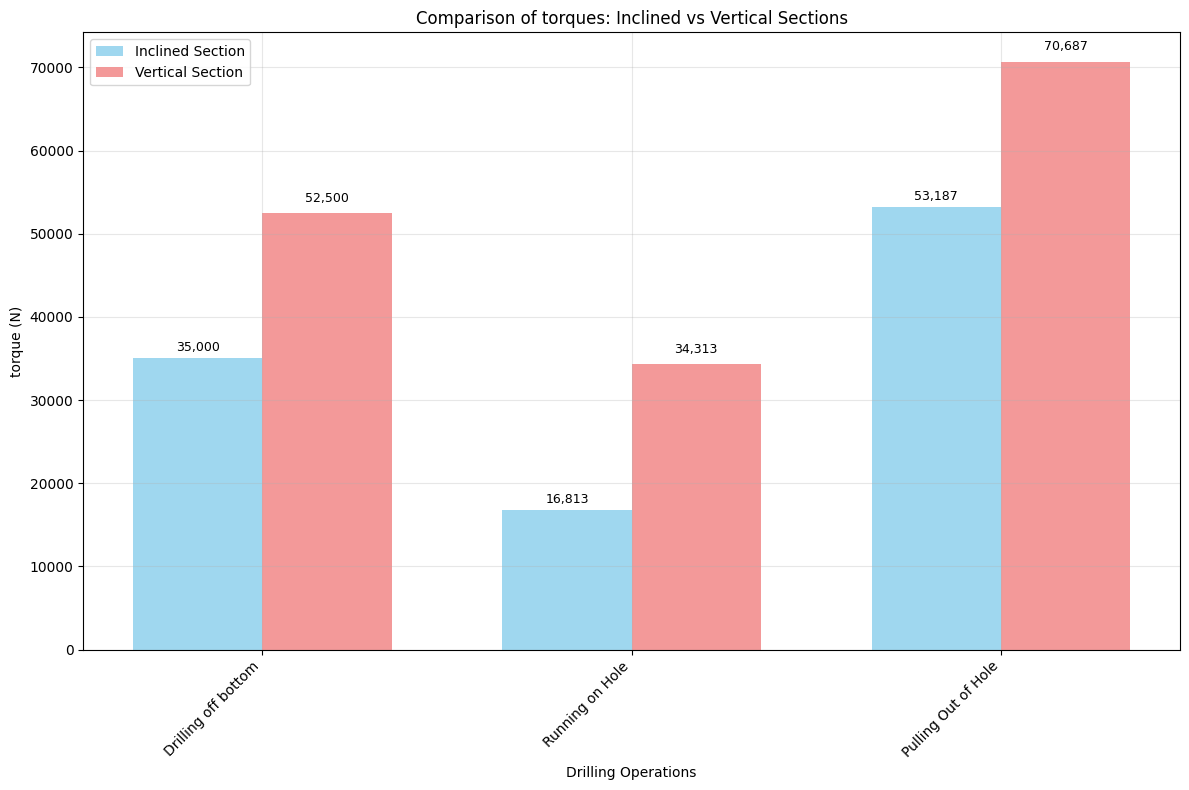

In [ ]:
# Create a combined comparison histogram
plt.figure(figsize=(12, 8))

x = np.arange(len(operations))
width = 0.35

bars1 = plt.bar(x - width/2, inclined_torques, width, label='Inclined Section',
                color='skyblue', alpha=0.8)
bars2 = plt.bar(x + width/2, vertical_torques, width, label='Vertical Section',
                color='lightcoral', alpha=0.8)

plt.xlabel('Drilling Operations')
plt.ylabel('torque (N)')
plt.title('Comparison of torques: Inclined vs Vertical Sections')
plt.xticks(x, operations, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., height1 + 500,
             f'{height1:,.0f}', ha='center', va='bottom', fontsize=9)
    plt.text(bar2.get_x() + bar2.get_width()/2., height2 + 1000,
             f'{height2:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics
print("\nSUMMARY STATISTICS")
print("=" * 30)
print(f"Maximum Inclined torque: {max(inclined_torques):,.2f} N ({operations[inclined_torques.index(max(inclined_torques))]})")
print(f"Maximum Vertical torque: {max(vertical_torques):,.2f} N ({operations[vertical_torques.index(max(vertical_torques))]})")
print(f"Minimum Inclined torque: {min(inclined_torques):,.2f} N ({operations[inclined_torques.index(min(inclined_torques))]})")
print(f"Minimum Vertical torque: {min(vertical_torques):,.2f} N ({operations[vertical_torques.index(min(vertical_torques))]})")
print(f"Average Inclined torque: {np.mean(inclined_torques):,.2f} N")
print(f"Average Vertical torque: {np.mean(vertical_torques):,.2f} N")


SUMMARY STATISTICS
Maximum Inclined torque: 53,186.53 N (Pulling Out of Hole)
Maximum Vertical torque: 70,686.53 N (Pulling Out of Hole)
Minimum Inclined torque: 16,813.47 N (Running on Hole)
Minimum Vertical torque: 34,313.47 N (Running on Hole)
Average Inclined torque: 35,000.00 N
Average Vertical torque: 52,500.00 N
